<a href="https://colab.research.google.com/github/Danjstr/AIM-5001/blob/master/D_Strauss_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import pandas as Pd
import pandas as pd
url = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'
flight_data = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

Start off with a basic analysis of your data. Take a look at the first and last five rows of the data. Retrieve the Data's description and info as well as the columns and its shape. This is an essential starting point to allow us to know if and how much work needs to be done to our data before we start answering our research questions.

Shown below is the result of these queries. The only real issue being in the (.info) returned. As it shows us we seem to have some missing values in some of our columns. We will deal with that later.

In [2]:
#View the head of our data. 
flight_data.head()


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,44.0,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [3]:
#View the tail of our data. 
flight_data.tail()

  

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
19995,2011,2,25,5,1126.0,1333.0,CO,1719,N19621,187.0,152.0,8.0,-4.0,IAH,MTJ,926,5.0,30.0,0,NaN,0
19996,2011,2,25,5,941.0,1111.0,CO,1723,N37298,210.0,193.0,0.0,11.0,IAH,ONT,1334,5.0,12.0,0,NaN,0
19997,2011,2,25,5,722.0,948.0,CO,1746,N37408,146.0,115.0,-17.0,-3.0,IAH,ORD,925,17.0,14.0,0,NaN,0
19998,2011,2,25,5,1909.0,2216.0,CO,1748,N27239,127.0,106.0,-10.0,12.0,IAH,FLL,965,6.0,15.0,0,NaN,0
19999,2011,2,25,5,1255.0,1553.0,CO,1757,N14604,118.0,83.0,-3.0,5.0,IAH,ATL,689,13.0,22.0,0,NaN,0


In [4]:
#View the description of our data. 
flight_data.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,20000.0,20000.000000,20000.000000,20000.000000,19785.000000,19766.000000,20000.000000,19738.000000,19738.000000,19738.000000,19785.000000,20000.000000,19766.000000,19780.000000,20000.000000,20000.000000
mean,2011.0,1.054500,16.319000,4.020300,1396.328228,1586.669382,1626.416900,126.795319,105.584355,5.205340,8.297700,772.899550,6.076546,15.134328,0.011200,0.001900
std,0.0,0.227007,9.025692,2.096904,441.598739,458.489922,1142.067143,60.158125,57.655970,25.383494,23.934218,458.640531,4.085732,7.046056,0.105238,0.043549
min,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,23.000000,-49.000000,-18.000000,127.000000,1.000000,4.000000,0.000000,0.000000
25%,2011.0,1.000000,8.000000,2.000000,1026.000000,1224.250000,582.000000,74.000000,54.000000,-8.000000,-3.000000,351.000000,4.000000,10.000000,0.000000,0.000000
50%,2011.0,1.000000,17.000000,4.000000,1416.000000,1620.000000,1644.000000,123.000000,102.000000,0.000000,1.000000,787.000000,5.000000,14.000000,0.000000,0.000000
75%,2011.0,1.000000,25.000000,6.000000,1801.000000,1955.000000,2536.000000,162.000000,138.000000,11.000000,10.000000,1034.000000,7.000000,18.000000,0.000000,0.000000
max,2011.0,2.000000,31.000000,7.000000,2335.000000,2400.000000,7037.000000,539.000000,499.000000,775.000000,780.000000,3904.000000,140.000000,78.000000,1.000000,1.000000


In [5]:
#View the info of our data. 
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               20000 non-null  int64  
 1   Month              20000 non-null  int64  
 2   DayofMonth         20000 non-null  int64  
 3   DayOfWeek          20000 non-null  int64  
 4   DepTime            19785 non-null  float64
 5   ArrTime            19766 non-null  float64
 6   UniqueCarrier      20000 non-null  object 
 7   FlightNum          20000 non-null  int64  
 8   TailNum            19892 non-null  object 
 9   ActualElapsedTime  19738 non-null  float64
 10  AirTime            19738 non-null  float64
 11  ArrDelay           19738 non-null  float64
 12  DepDelay           19785 non-null  float64
 13  Origin             20000 non-null  object 
 14  Dest               20000 non-null  object 
 15  Distance           20000 non-null  int64  
 16  TaxiIn             197

In [6]:
#View all the columns of our data. 
flight_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted'],
      dtype='object')

In [7]:
#View the shape of our data. 
flight_data.shape

(20000, 21)

Introduction: 

**Research question 1:** What percentage of planes(TailNum) arrive more than 15 min late? This information is important because regular arrival delays might indicate the inefficiency of an airplane covering the distance between point "A" and Point "B" of a flight. This is important for airline carriers as they may need to make changes if certain planes are consistently late.

I will create a new data frame that includes TailNum and ArrDelay. I will drop any rows that have missing values. I will check the maximum and minimum arrival delay as a sanity check. It should be common for planes to arrive at their gate late but uncommon for them to arrive too early. I will use graphs to help visualize the percentages of planes arriving late. Last I will use the .quantile() function to determine at what percentage do planes start arriving more than 15 minutes late.

**Research question 2:** Which airplane carrier contributes the most to departure delays. This is important because customers may begin looking for other airline providers if one of them is more frequently departing late. This is important to the airline in consideration as they will need to make the changes to reduce delays.

I will create a new data frame that includes UniqueCarrier and DepDelay? I will drop any rows that have missing values. I will check the maximum and minimum departure delay as a sanity check.  It should be common for planes to leave their gate late but uncommon for them to leave too early. I will use graphs and return the data frame with the fifty highest delays first. Then count the number of each UniqueCarrier in the top fifty to determine which carrier contributes most to delays.

**Research question 3:** Does the day of the week influence the distance of the flight? Do people fly further during the week or on weekends? This is important for scheduling flights. If people fly further on weekends. It would pay for carriers to provide more long-range flights on the weekends.

I will create a new data frame that includes DayOfWeek and Distance. I will drop any rows that have missing values. I will rename DayOfWeek to Day_Number. I will create a new column Day that will correspond with the day number. It will have the days of the week as an object for each of the values in the now renamed Day_Number column. This is mostly for readability's sake. It's hard to determine which day is which day at a glance when they are all represented by numbers. I will check the maximum distance traveled and the minimum as a sanity check. Flight distance can not be negative. Nor should flights be more than 9,534miles which is the world's current longest flight(according to google). I will use a scatter plot to try and determine if there is an obvious visual difference in flight distance throughout the week. Then I will determine the exact correlation between the days of the week and distance traveled.

Data Preparation: 

The first step in our process is to remove the obvious fat. Most of the columns in this data set are unnecessary for our research questions. As such they are dropped and the remaining columns are saved as a new data frame.

In [8]:
#Drop all unnecessary columns
new_flight_data= flight_data.drop(['Year', 'Month','DayofMonth','DepTime','ArrTime','FlightNum','ActualElapsedTime','AirTime','Origin','Dest','TaxiIn','TaxiOut','Cancelled','CancellationCode','Diverted'], axis=1)

Print the head of our new data frame to make sure the drop was successful.

In [9]:
#View the head of our new data frame. 
new_flight_data.head()

,DayOfWeek,UniqueCarrier,TailNum,ArrDelay,DepDelay,Distance
0,6,AA,N576AA,-10.0,0.0,224
1,7,AA,N557AA,-9.0,1.0,224
2,1,AA,N541AA,-8.0,-8.0,224
3,2,AA,N403AA,3.0,3.0,224
4,3,AA,N492AA,-3.0,5.0,224


Retrieve the .info of the data frame to determine if there are any columns with missing values that need to be dealt with.

In [10]:
#View the info of our new data frame. 
new_flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DayOfWeek      20000 non-null  int64  
 1   UniqueCarrier  20000 non-null  object 
 2   TailNum        19892 non-null  object 
 3   ArrDelay       19738 non-null  float64
 4   DepDelay       19785 non-null  float64
 5   Distance       20000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 937.6+ KB


Yes, TailNum, ArrDelay, and DepDelay all seem to have missing values in their respective columns. Fortunately, the amount of data missing is negligible for our purposes. So we can simply drop the rows with missing data. Allowing us to avoiding more complex data imputation.

After we drop the rows with missing values confirm the drop was successful with .info.

In [11]:
#Drop rows with missing values from our new data frame.
new_flight_dropna= new_flight_data.dropna(subset=['TailNum', 'ArrDelay','DepDelay'])
#View the info of our new data frame after having dropped rows with missing values.
new_flight_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19738 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DayOfWeek      19738 non-null  int64  
 1   UniqueCarrier  19738 non-null  object 
 2   TailNum        19738 non-null  object 
 3   ArrDelay       19738 non-null  float64
 4   DepDelay       19738 non-null  float64
 5   Distance       19738 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ MB


Rename DayOfWeek into Day_Number. We will be creating a new day column with the actual days of the week listed in it to help with readability. So we need to be able to differentiate between the two columns.

In [12]:
#rename the DayOfWeek column to Day_Number
new_flight_n_d=new_flight_dropna.rename(columns={'DayOfWeek': 'Day_Number'})


Print the columns to make sure that DayOfWeek has successfully been relabelled Day_Number.

In [13]:
#View the column names again to make sure that that DayOfWeek has been changed
new_flight_n_d.columns

Index(['Day_Number', 'UniqueCarrier', 'TailNum', 'ArrDelay', 'DepDelay',
       'Distance'],
      dtype='object')

Create your new day column. Make sure each value in Day corresponds correctly with the appropriate number value in Day_Number by printing it.

In [14]:
#Add a new column Day That has all the days of the week in it. 
new_flight_n_d['Day'] = new_flight_n_d['Day_Number'].replace([1,2,3,4,5,6,7],['Monday','Tuseday','Wendsday','Thursday','Friday','Saturday','Sunday'])


In [15]:
#Print the modified data frame
print(new_flight_n_d)

       Day_Number UniqueCarrier TailNum  ArrDelay  DepDelay  Distance       Day
0               6            AA  N576AA     -10.0       0.0       224  Saturday
1               7            AA  N557AA      -9.0       1.0       224    Sunday
2               1            AA  N541AA      -8.0      -8.0       224    Monday
3               2            AA  N403AA       3.0       3.0       224   Tuseday
4               3            AA  N492AA      -3.0       5.0       224  Wendsday
...           ...           ...     ...       ...       ...       ...       ...
19995           5            CO  N19621       8.0      -4.0       926    Friday
19996           5            CO  N37298       0.0      11.0      1334    Friday
19997           5            CO  N37408     -17.0      -3.0       925    Friday
19998           5            CO  N27239     -10.0      12.0       965    Friday
19999           5            CO  N14604      -3.0       5.0       689    Friday

[19738 rows x 7 columns]


Exploratory Data Analysis: 

Print the maximum and minimum flight distance as a sanity check. The distance of the longest commercial passenger jet is 9,534 miles. Therefore we must show that we have no maximum values above that. Also, We want to ensure that we have no negative values for our minimum. As flights don't fly negative distance.

In [16]:
#View the Maximum flight distance in our data set.
new_flight_n_d['Distance'].max()

3904

In [17]:
#View the Minimum flight distance in our data set.
new_flight_n_d['Distance'].min()

127

Print the Maximum and minimum arrival delay as a sanity check. Planes may occasionally arrive early due to favorable wind conditions. But no plane should arrive hours early. As such our negative values seem to be accurate as we see no plane has been more than 49 minutes early. We have more leeway for arrival delays as there is any number of reasons for planes arriving late (most likely a take-off delay). As such the positive value indicating our highest late value being over eight hours is not surprising.

In [18]:
#View the Maximum arrival delay in our data set.
new_flight_n_d['ArrDelay'].max()

775.0

In [19]:
#View the Minimum arrival delay in our data set.
new_flight_n_d['ArrDelay'].min()

-49.0

It is unlikely for planes to take off too early before their departure time. As such our highest early departure of 18 minutes seems accurate. Our highest late departure of over eight hours also seems accurate as there is any number of reasons for late departures. Including mechanical or weather-related issues.

In [20]:
#View the Maximum Departure delay in our data set.
new_flight_n_d['DepDelay'].max()

780.0

In [21]:
#View the Minimum Departure delay in our data set.
new_flight_n_d['DepDelay'].min()

-18.0

For our last sanity check just make sure our new day column has every day of the week in it.

In [22]:
#View all Unique values in the newly created day column
new_flight_n_d['Day'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuseday', 'Wendsday', 'Thursday',
       'Friday'], dtype=object)

Print the data's head again before we start graphing to make sure everything is as we want it.

In [23]:
#View the head of our data frame to make sure all changes have been made correctly.
new_flight_n_d.head()

,Day_Number,UniqueCarrier,TailNum,ArrDelay,DepDelay,Distance,Day
0,6,AA,N576AA,-10.0,0.0,224,Saturday
1,7,AA,N557AA,-9.0,1.0,224,Sunday
2,1,AA,N541AA,-8.0,-8.0,224,Monday
3,2,AA,N403AA,3.0,3.0,224,Tuseday
4,3,AA,N492AA,-3.0,5.0,224,Wendsday


Use seaborn to print a few graphs to help us get a better understanding of our data at a glance and see if we can derive any valuable insights from it.

We see that Departure Delay and Arrival Delay have a positive correlation but aside from that there is no valuable insights for our research goals. But always best to check.

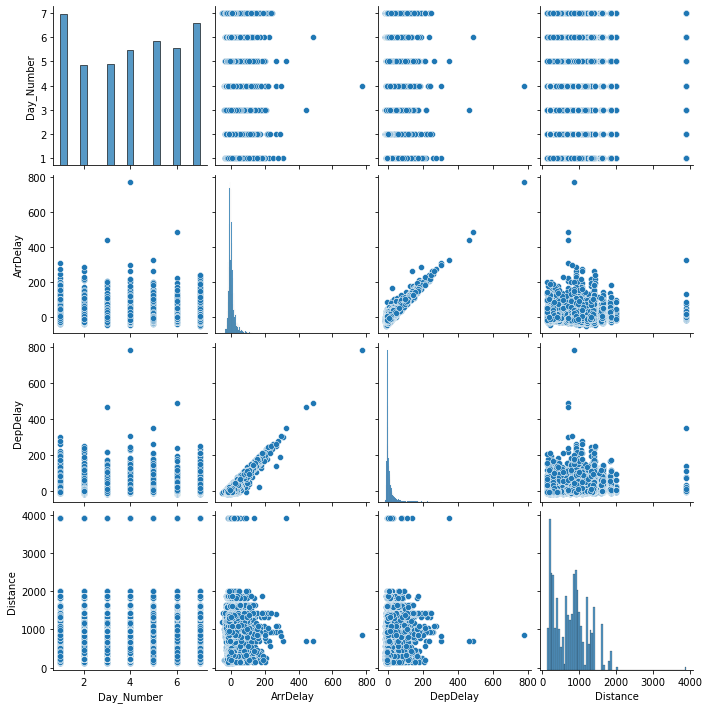

In [24]:
#import seaborn as sns
import seaborn as sns
#Generate some graphs using seaborn to help us gain insight
sns.pairplot(new_flight_n_d)

Explorotory Data Anlysis for Reaserch question 1.

Try to get a visual of the distribution of the number of flights that arrive more than 15 minutes late.

We see in this graph that there are two distinct sections. The thick band at the bottom where we have most of our data. As well as the outliers that seem to indicate exceptionally long arrival delays.

Unfortunately, as there are several hundred tailnumbers in this data set we cant use a scatter plot or bar plot to get an actual count via a graph easily. 

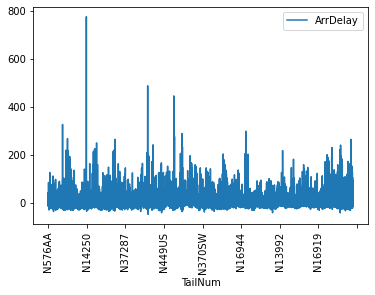

In [25]:
# import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
#Create a line plot of arrival delay by flight number
new_flight_n_d.plot(kind='line', x='TailNum', y='ArrDelay')
#Rotate the xlabels 90 degrees
plt.xticks(rotation=90)
#Show the Data
plt.show()

Fortunately, we can get a visual of our general distribution using a box plot.

We can see that our data indicates that most of the delays are usually less than 200 minutes.

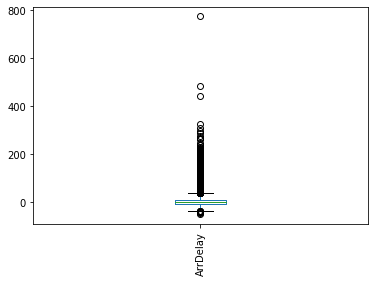

In [26]:
#Create a box plot of our data arrival delay by flight number
new_flight_n_d.plot(kind='box', x='TailNum', y='ArrDelay')
#Rotate the xlabels 90 degrees
plt.xticks(rotation=90)
#Show the Data
plt.show()

Explorotory Data Anlysis for Reaserch question 2.

Here we use a scatter plot to visualize how many delays and how long are the delays for each of the different airline carriers.

We see immediately that airline carrier F9 has the shortest delays and CO has the longest. But we need more data to determine who contributes to delayed departures the most.

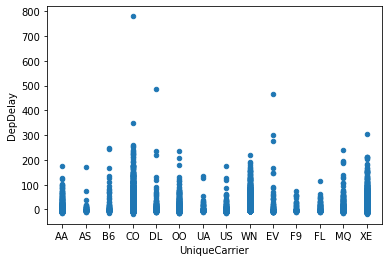

In [27]:
#Create a scatter of plot of our departure delay by unique carrier
new_flight_n_d.plot(kind='scatter', x='UniqueCarrier', y='DepDelay')

Here we print the data frame with our top fifty delayed values printed in descending order. We then save this as its own data frame for later.

In [28]:
#Order the first 50 rows of our data frame with departure delay in descending order 
Contributes_delay=new_flight_n_d.sort_values(['DepDelay','UniqueCarrier'], ascending = (False, True))
#Save the top 50 rows as its own data frame
top_50_delays=Contributes_delay.head(50)
#Print the new data frame
print(top_50_delays)

       Day_Number UniqueCarrier TailNum  ArrDelay  DepDelay  Distance       Day
2502            4            CO  N74856     775.0     780.0       862  Thursday
6532            6            DL  N762NC     487.0     488.0       689  Saturday
8256            3            EV  N137EV     445.0     465.0       689  Wendsday
936             5            CO  N77066     326.0     351.0      3904    Friday
12994           4            XE  N11127     298.0     306.0       817  Thursday
8266            1            EV  N723EV     311.0     302.0       689    Monday
8305            1            EV  N708EV     276.0     275.0      1076    Monday
19888           5            CO  N15710     264.0     262.0      1091    Friday
3169            1            CO  N78511     249.0     258.0       925    Monday
4383            2            CO  N30401     264.0     252.0       925   Tuseday
19215           7            B6  N766JB     240.0     247.0      1428    Sunday
19187           4            B6  N552JB 

Explorotory Data Anlysis for Reaserch question 3.

Here we show a scatter plot of the Distance traveled by day to see if there is a difference between the flight distance on weekends vs other days of the week.

We can see that our hypothesis is wrong. The flight distance is practically uniform for all days of the week.

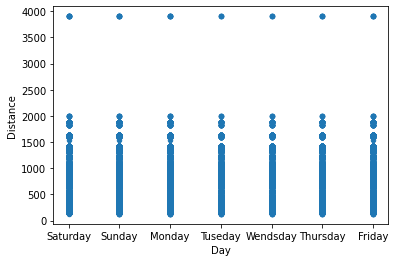

In [29]:
#Generate a scatter plot of Distance traveled by Day
new_flight_n_d.plot(kind='scatter', x='Day', y='Distance')

Research Results:

Results for Research Question 1:

Use the .quantile() function to print the values at different percentages of the data and determine at what percentage are flights 15 minutes late.

We see that at roughly the 80th percentile we reach a value of 15 minutes late. As such everything over the 80th percentile will be more than 15 minutes late.

Answer to research question 1:So the answer to our research question is that just under 20% of flights are over 15 minutes late.

In [30]:
#Retrieve the values for different percentiles of the data
print(new_flight_n_d['ArrDelay'].quantile(0.0))
print(new_flight_n_d['ArrDelay'].quantile(0.25))
print(new_flight_n_d['ArrDelay'].quantile(0.50))
print(new_flight_n_d['ArrDelay'].quantile(0.75))
print(new_flight_n_d['ArrDelay'].quantile(0.805))
print(new_flight_n_d['ArrDelay'].quantile(1.0))

-49.0
-8.0
0.0
11.0
15.0
775.0


Results for Research Question 2:

We take our previously saved data frame of the top fifty departure delays and we count the number of each value in the 'UniqueCarrier' column to determine which carriers have contributed most to airline delays.

Answer to research question 2: The result is that airline carrier CO has contributed 23 of the fifty delays in the top fifty delays. This makes it the biggest contributor to delayed flights among all the airline carriers.

In [31]:
#Count the values in the new top_50_delays data frame
top_50_delays['UniqueCarrier'].value_counts()

CO    23
XE     8
WN     4
MQ     4
DL     3
OO     3
EV     3
B6     2
Name: UniqueCarrier, dtype: int64

Results for Research Question 3:

Here we print the correlation between the  Day_Number column and the Distance column to determine if there is any relationship between distance traveled and any of the days of the week.

Answer to research question 3: Our correlation is a measly 0.031 indicating almost no relationship between distance traveled and the day of the week. Meaning the day of the week does not influence the distance of the flight.

In [32]:
#Save the column "Day_Number" as column_1
column_1 = new_flight_n_d['Day_Number']
#Save the column "Distance" as column_2
column_2 = new_flight_n_d['Distance']
#Find the correlation between the two columns
correlation = column_1.corr(column_2)
#Print the results
print(correlation)

0.031053267904717175


Conclusions 


In summary, we have successfully answered all three of our research questions.

For question one "What percentage of planes(TailNum) arrive more than 15 min late?" We determined that just under 20% of flights are over 15 minutes late. Meaning over 80% of flights arrived on time, early, or are less than 15 minutes late.

For question two "Which airplane carrier contributes the most to departure delays?" We determined that the airline carrier CO was the heaviest contributor to departure delays. As they made up 23 of the top fifty delayed departures.

For question three "Does the day of the week influence the distance of the flight?" We determined that there is no relationship between the distance traveled and the day of the week. In fact, flight distance is roughly uniform across all days of the week.